In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Image dimensions
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize images to [0, 1] range
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # To create train/validation split if needed
)

# Load images and labels using ImageDataGenerator for train, validation, and test sets
train_generator = datagen.flow_from_directory(
    'train_data',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    'val_data',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'test_data',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 2870 images belonging to 3 classes.
Found 562 images belonging to 3 classes.
Found 572 images belonging to 3 classes.


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# 1st Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='elu', input_shape=(224, 224, 3))) 
# Input: (224, 224, 3), Output: (222, 222, 32)
# Explanation: 3x3 kernel reduces each dimension by 2, 32 filters increase depth.

# 1st Pooling Layer
model.add(layers.MaxPooling2D((2, 2))) 
# Input: (222, 222, 32), Output: (111, 111, 32)
# Explanation: Max pooling reduces each dimension by half, depth remains the same.

# 2nd Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='elu'))
# Input: (111, 111, 32), Output: (109, 109, 64)
# Explanation: Kernel further reduces dimensions, and 64 filters increase depth.

# 2nd Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))
# Input: (109, 109, 64), Output: (54, 54, 64)
# Explanation: Pooling reduces dimensions by half again.

# 3rd Convolutional Layer
model.add(layers.Conv2D(128, (3, 3), activation='elu'))
# Input: (54, 54, 64), Output: (52, 52, 128)
# Explanation: Kernel reduces spatial dimensions, 128 filters for richer features.

# 3rd Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))
# Input: (52, 52, 128), Output: (26, 26, 128)
# Explanation: Pooling halves dimensions.

# 4th Convolutional Layer
model.add(layers.Conv2D(128, (3, 3), activation='elu'))
# Input: (26, 26, 128), Output: (24, 24, 128)

# 4th Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))
# Input: (24, 24, 128), Output: (12, 12, 128)

# Flatten the output to feed into Dense layers
model.add(layers.Flatten()) 
# Input: (12, 12, 128), Output: (18432)
# Explanation: Flatten converts 3D output into 1D vector.

# Dense Fully Connected Layer
model.add(layers.Dense(512, activation='elu'))
# Input: 18432, Output: 512
# Explanation: Fully connected layer reduces dimensionality to 512.

# Dropout Layer for regularization
model.add(layers.Dropout(0.5)) 
# Explanation: Dropout helps prevent overfitting by randomly turning off 50% of neurons.

# Output Layer
model.add(layers.Dense(3, activation='softmax'))
# Input: 512, Output: 3 (Number of classes)
# Explanation: Softmax for multi-class classification, outputs class probabilities.

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


/Users/mithindev/Desktop/COLLEGE/SEM-5/DL/CODE/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,680,067 (36.93 MB)

 Trainable params: 9,680,067 (36.93 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 545ms/step - accuracy: 0.5019 - loss: 3.6816 - val_accuracy: 0.7096 - val_loss: 0.6669
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.7188 - loss: 0.6419 - val_accuracy: 0.7778 - val_loss: 0.4703
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 544ms/step - accuracy: 0.7244 - loss: 0.6912 - val_accuracy: 0.8051 - val_loss: 0.5388
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.8750 - loss: 0.4587 - val_accuracy: 0.8889 - val_loss: 0.3505
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 83s 923ms/step - accuracy: 0.7849 - loss: 0.5850 - val_accuracy: 0.8051 - val_loss: 0.4996
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 0.8125 - loss: 0.6032 - val_accuracy: 0.7778 - val_loss: 0.4900
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 552ms/step - accuracy: 0.7839 - loss: 0.5655 - val_accuracy: 0.8051 - val_loss: 0.5223
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - accuracy: 0.7812 - loss: 0.5359 - val_accuracy

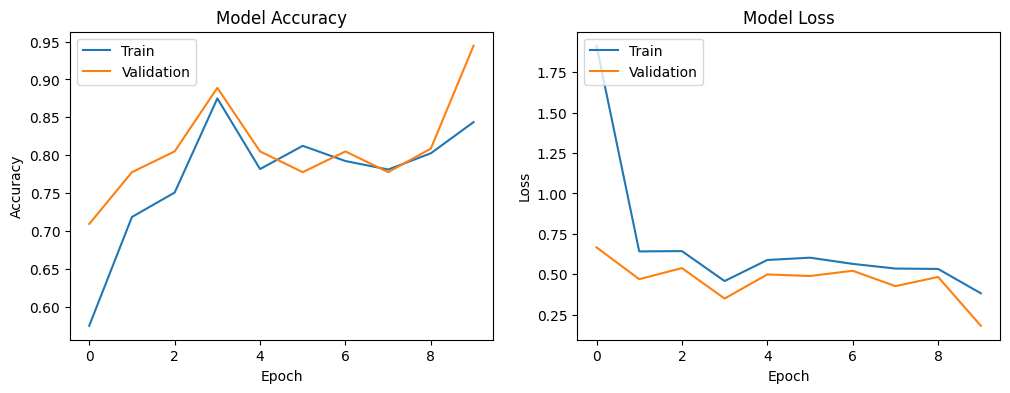

Test Loss: 0.3590
Test Accuracy: 88.97%


In [6]:
import matplotlib.pyplot as plt

# Define the number of epochs and steps per epoch
EPOCHS = 10

# Calculate the steps per epoch and validation steps
train_steps = train_generator.samples // BATCH_SIZE
val_steps = val_generator.samples // BATCH_SIZE

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=val_steps
)

# Evaluate the model on the test data
test_steps = test_generator.samples // BATCH_SIZE
test_loss, test_acc = model.evaluate(test_generator, steps=test_steps)

print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Print test accuracy and loss
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")
